<a href="https://colab.research.google.com/github/experimentalsolution/process-mining/blob/main/mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Process Mining with PM4Py  
### A Hands-On Tutorial Using Real Event Log Data
In this notebook, we will explore how to perform **process discovery** in a simple way and find out bottleneck of a real process




In [3]:
!pip install pm4py





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.6 MB/s eta 0:00:00


In [13]:
import pm4py

import pandas as pd

In [14]:
df = pd.read_csv('Insurance_claims_event_log.csv')

In [16]:
df.head()

,case_id,activity_name,timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type
0,a626bc58-a7b2-4eff-aca9-2a622cd0c492,First Notification of Loss (FNOL),2020-09-24 14:08:42.423530,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
1,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Assign Claim,2020-10-13 03:51:28.627923,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
2,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Claim Decision,2020-10-14 22:30:14.948970,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
3,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Set Reserve,2020-10-24 11:49:39.053890,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
4,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Payment Sent,2020-10-27 05:46:04.378718,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA


In [17]:
df = df.rename(columns={
    "case_id": "case:concept:name",
    "activity_name": "concept:name",
    "timestamp": "time:timestamp"
})


In [18]:
df["time:timestamp"] = pd.to_datetime(df["time:timestamp"])


In [19]:
df.head()

,case:concept:name,concept:name,time:timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type
0,a626bc58-a7b2-4eff-aca9-2a622cd0c492,First Notification of Loss (FNOL),2020-09-24 14:08:42.423530,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
1,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Assign Claim,2020-10-13 03:51:28.627923,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
2,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Claim Decision,2020-10-14 22:30:14.948970,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
3,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Set Reserve,2020-10-24 11:49:39.053890,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
4,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Payment Sent,2020-10-27 05:46:04.378718,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA


In [22]:
import pm4py
log = pm4py.convert_to_event_log(df)
log


[{'attributes': {'concept:name': 'a626bc58-a7b2-4eff-aca9-2a622cd0c492'}, 'events': [{'concept:name': 'First Notification of Loss (FNOL)', 'time:timestamp': Timestamp('2020-09-24 14:08:42.423530'), 'claimant_name': 'Karen Lopez', 'agent_name': 'Thomas Cantu', 'adjuster_name': 'Ian Garcia', 'claim_amount': 1914.96, 'claimant_age': 75, 'type_of_policy': 'Collision', 'car_make': 'Honda', 'car_model': 'Civic', 'car_year': 2012, 'type_of_accident': 'Rollover', 'user_type': 'RPA'}, '..', {'concept:name': 'Close Claim', 'time:timestamp': Timestamp('2020-11-06 00:55:19.480774'), 'claimant_name': 'Karen Lopez', 'agent_name': 'Thomas Cantu', 'adjuster_name': 'Ian Garcia', 'claim_amount': 1914.96, 'claimant_age': 75, 'type_of_policy': 'Collision', 'car_make': 'Honda', 'car_model': 'Civic', 'car_year': 2012, 'type_of_accident': 'Rollover', 'user_type': 'RPA'}]}, '....', {'attributes': {'concept:name': '45719dbf-c504-4ee5-a8bc-ba357aaf54b5'}, 'events': [{'concept:name': 'First Notification of Loss 

In [24]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization


In [26]:
dfg = dfg_discovery.apply(log)
dfg


Counter({('First Notification of Loss (FNOL)', 'Assign Claim'): 30000,
         ('Assign Claim', 'Claim Decision'): 30000,
         ('Claim Decision', 'Set Reserve'): 30000,
         ('Set Reserve', 'Payment Sent'): 30000,
         ('Payment Sent', 'Close Claim'): 30000})

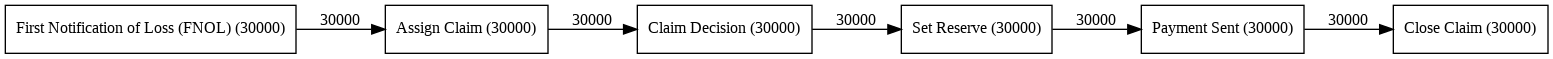

In [28]:
gviz = dfg_visualization.apply(dfg, log=log)
dfg_visualization.view(gviz)


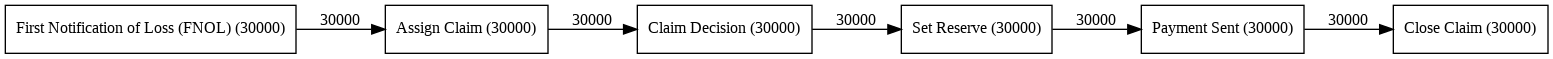

In [30]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg_freq = dfg_discovery.apply(log, variant=dfg_discovery.Variants.FREQUENCY)
gviz_freq = dfg_visualization.apply(dfg_freq, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz_freq)


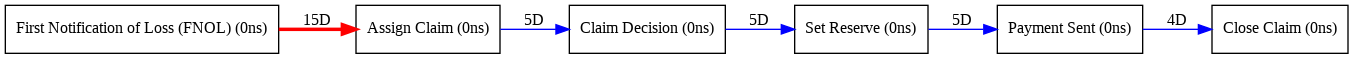

In [32]:
dfg_perf = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz_perf = dfg_visualization.apply(dfg_perf, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz_perf)
